# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

from xgboost import XGBRegressor
from xgboost import plot_importance
import xgboost as xgb
#import lightgbm as lgb

from xgboost import plot_importance 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

# 데이터 불러오기 
1. iszero
2. nozero
3. nf (new feature)

In [20]:
path = "./Dataset/"

# is zero
isZero = pd.read_csv(path+"da_data.csv")

# no zero 
noZero = pd.read_csv(path+"da_data_nozero.csv")

# new features 
nf_peppers = pd.read_csv(path+"건고추Model.csv")
nf_green_onion = pd.read_csv(path+"대파Model.csv")
nf_garlic = pd.read_csv(path+"마늘Model.csv")
nf_radish = pd.read_csv(path+"무Model.csv")
nf_cabbage = pd.read_csv(path+"배추Model.csv")

# 함수화

In [42]:
def pre_processing(data) :
    scaler = MinMaxScaler()
    scale_cols = data.iloc[:,1:].columns
    
    data.sort_index(ascending=False).reset_index(drop=True)
    
    scaled = scaler.fit_transform(data[scale_cols])
    scaled = pd.DataFrame(scaled)
    scaled.columns = scale_cols
    
    return scaled


def get_data_split(data, X_column, y_column) :
    train_X, test_X, train_y, test_y = train_test_split(
    data[X_column], 
    data[y_column],
    test_size=0.2,
    shuffle=True,   # random split 
    random_state=42) # seed 고정, same sampling 
    
    return train_X, test_X, train_y, test_y


def gridsearchCV (model, parameters, X_train, y_train) :
    grid = GridSearchCV(model, param_grid = parameters, scoring='accuracy', cv=2) # cv is fold num
    grid.fit(X_train, y_train)
    
    print('GridSearchCV 최적 하이퍼 파라미터 :', grid.best_params_)
    print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid.best_score_))
    print('GridSearchCV 최적 하이퍼 파라미터로 학습된 Esimator 반환')
    
    return grid.best_estimator_


def feature_importance(model_xgb) : 
    %matplotlib inline
    plt.rcParams['axes.unicode_minus'] = False
    font_path = "C:/Windows/Fonts/NGULIM.TTF"
    font = fm.FontProperties(fname=font_path).get_name()
    rc('font', family=font)

    fig, ax = plt.subplots(figsize=(10,12))
    plot_importance(model_xgb, ax=ax)


def graph(pred, test_label) :
  plt.figure(figsize=(16, 9))
  plt.plot(test_label, label = 'actual')
  plt.plot(pred, label = 'prediction')
  plt.legend()
  plt.show()

In [37]:
input_data = pre_processing(nf_garlic)

X_column = ['평균강수량', '최대강수량', '평균기온', '최고기온', '최저기온', '평균습도', '최저습도', '평균풍속',
       '최대풍속', '마늘거래량', '마늘생산량', '마늘저장이월량', '마늘수입량', '마늘수입금액',
       '마늘재배면적', '고급휘발유', '보통휘발유', '자동차용경유', '소비자물가지수', '농축수산물', '공업제품', '집세',
       '공공서비스', '개인서비스', '근원물가', '생활물가']
y_column = '마늘가격'

train_X, test_X, train_y, test_y = get_data_split(input_data, X_column, y_column)

In [34]:
model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

model_xgb.fit(train_X, train_y)

pred_xgb = model_xgb.predict(test_X)

# rmse
mse = mean_squared_error(test_y, pred_xgb)
print("mse:  %f" % mse)

rmse = np.sqrt(mse)
print("rmse: %f" %rmse)

mse:  0.002969
rmse: 0.054486


In [35]:
df_result = pd.DataFrame(list(zip(test_y, pred_xgb)), columns=['true_y', 'xgb_pred_y'])
df_result 

,true_y,xgb_pred_y
0,0.645817,0.709193
1,0.342449,0.393841
2,0.737943,0.718035
3,0.718780,0.634977
4,0.956784,0.872444
...,...,...
425,0.609715,0.637691
426,0.343394,0.358913
427,0.598075,0.621227
428,0.747306,0.794823


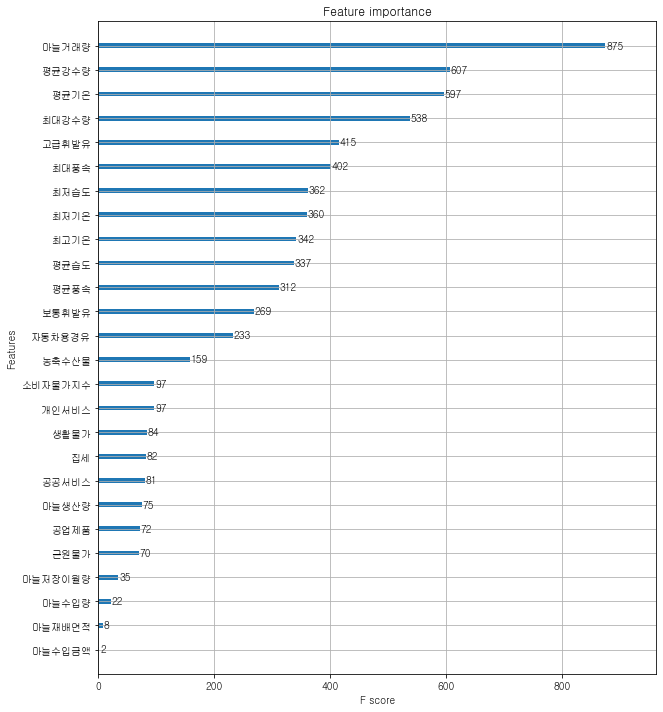

In [45]:
feature_importance(model_xgb)